## (A)VGG16 Model to train and test dataset of car-views

# 1.Import Libraries

In [61]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# 2.Image data generator

In [62]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [64]:
train="training"
train_genarator=train_datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
test="validation"
validation_generator=validation_datagen.flow_from_directory(
    test,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    

) 
    


Found 960 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [74]:
print("Integer values of classes:")
train_genarator.class_indices

Integer values of classes:


{'front': 0, 'rear': 1, 'side': 2}

# 3.VGG16 model

In [65]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [66]:
for layer in vgg.layers:
    layer.trainable=False
    

In [67]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# 4.Train the model

In [75]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
epoch=10

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/10
15/15 [==============================] - 223s 15s/step - loss: 1.7701 - accuracy: 0.4104 - val_loss: 0.9798 - val_accuracy: 0.5789
Epoch 2/10
15/15 [==============================] - 251s 17s/step - loss: 0.8721 - accuracy: 0.6406 - val_loss: 0.8603 - val_accuracy: 0.6374
Epoch 3/10
15/15 [==============================] - 239s 16s/step - loss: 0.6492 - accuracy: 0.7448 - val_loss: 0.8616 - val_accuracy: 0.6550
Epoch 4/10
15/15 [==============================] - 243s 16s/step - loss: 0.5658 - accuracy: 0.7760 - val_loss: 0.8623 - val_accuracy: 0.6199
Epoch 5/10
15/15 [==============================] - 302s 21s/step - loss: 0.4900 - accuracy: 0.8219 - val_loss: 0.7459 - val_accuracy: 0.6725
Epoch 6/10
15/15 [==============================] - 357s 24s/step - loss: 0.4032 - accuracy: 0.8542 - val_loss: 0.9038 - val_accuracy: 0.6316
Epoch 7/10
15/15 [==============================] - 337s 22s/step - loss: 0.3780 - accuracy: 0.8771 - val_loss: 0.7393 - val_accuracy: 0.7251
Epoch 

# Model accuracy

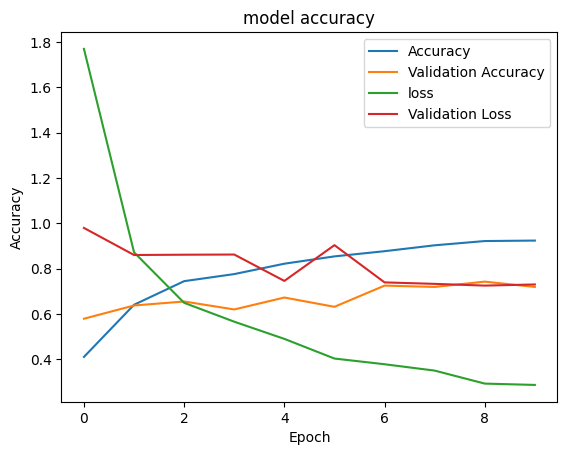

In [70]:

plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()




# 5.Test the model

# Test_Image1

1/1 [==============================] - 1s 727ms/step
[[0. 0. 1.]]
side


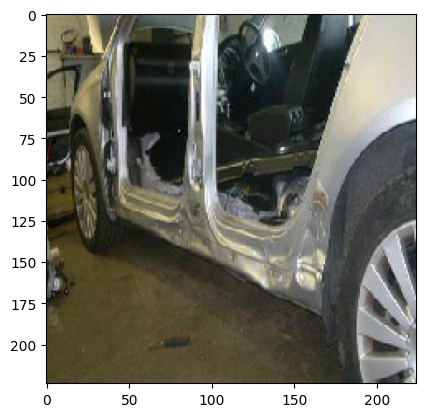

In [71]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img_pred=load_img("test/side.jpg",target_size=(224,224))
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))

img_pred=img_to_array(img_pred)

img_pred=np.expand_dims(img_pred, axis=0)

rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    if rslt[0][2]>rslt[0][0]:
        prediction="rear_side"
    else:   
        prediction="front"
    
else:
    prediction="side"
print(prediction)


# Test_Image2

1/1 [==============================] - 0s 303ms/step
[[1. 0. 0.]]
front


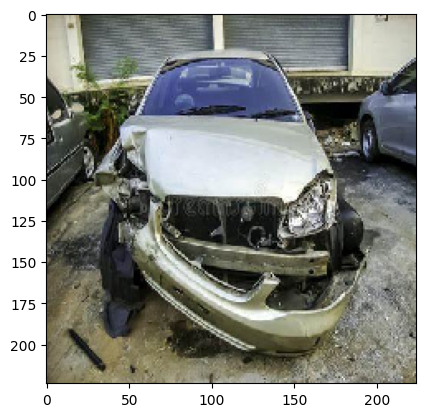

In [72]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
img_pred=load_img("test/frontside.jpg",target_size=(224,224))
plt.imshow(img_pred, cmap=plt.get_cmap('gray'))

img_pred=img_to_array(img_pred)

img_pred=np.expand_dims(img_pred, axis=0)

rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    if rslt[0][2]>rslt[0][0]:
        prediction="rear_side"
    else:   
        prediction="front"
    
else:
    prediction="side"
print(prediction)